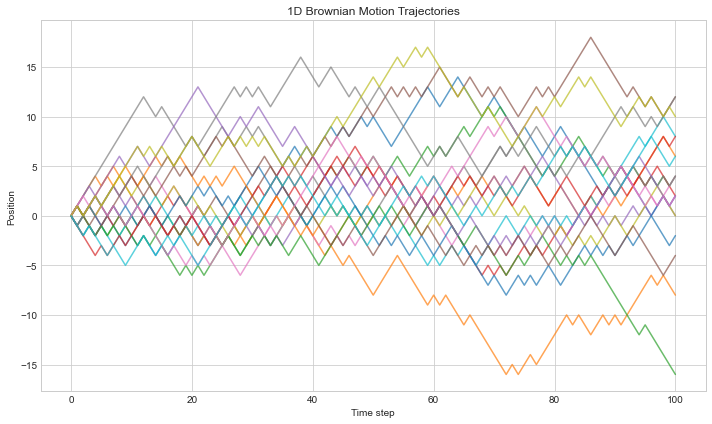

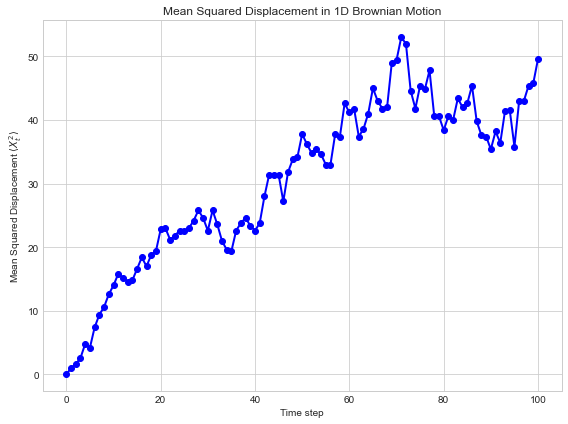

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

num_steps = 100       # タイムステップ数
num_traj = 20         # 軌道数
step_size = 1         # 各ステップの移動幅

# 各軌道の位置を記録する配列
trajectories = np.zeros((num_traj, num_steps+1))
for i in range(num_traj):
    steps = np.random.choice([step_size, -step_size], size=num_steps)
    trajectories[i, 1:] = np.cumsum(steps)

# 平均二乗変位の計算
msd = np.mean(trajectories**2, axis=0)

# 軌道のプロット
plt.figure(figsize=(10,6))
for traj in trajectories:
    plt.plot(traj, lw=1.5, alpha=0.7)
plt.xlabel("Time step")
plt.ylabel("Position")
plt.title("1D Brownian Motion Trajectories")
plt.tight_layout()
plt.savefig('BrownianMotion_Trajectories.pdf', format='pdf')
plt.show()

# 平均二乗変位のプロット
plt.figure(figsize=(8,6))
plt.plot(np.arange(num_steps+1), msd, 'bo-', lw=2)
plt.xlabel("Time step")
plt.ylabel(r"Mean Squared Displacement $\langle X_t^2 \rangle$")
plt.title("Mean Squared Displacement in 1D Brownian Motion")
plt.tight_layout()
plt.savefig('BrownianMotion_MSD.pdf', format='pdf')
plt.show()

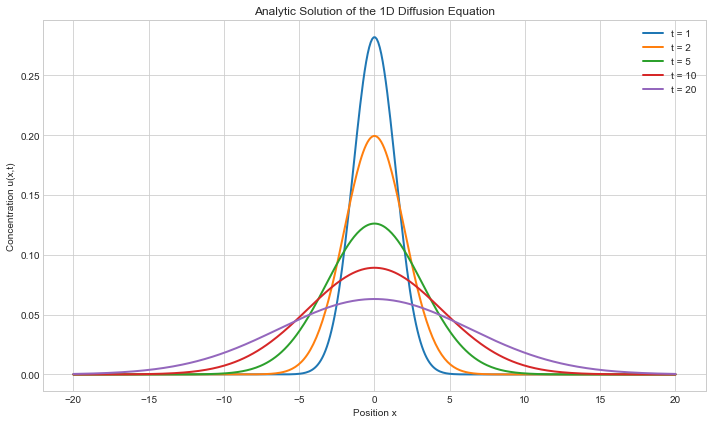

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

D = 1.0
x = np.linspace(-20, 20, 400)
t_values = [1, 2, 5, 10, 20]

plt.figure(figsize=(10,6))
for t in t_values:
    u = 1 / np.sqrt(4 * np.pi * D * t) * np.exp(-x**2 / (4 * D * t))
    plt.plot(x, u, lw=2, label=f"t = {t}")
plt.xlabel("Position x")
plt.ylabel("Concentration u(x,t)")
plt.title("Analytic Solution of the 1D Diffusion Equation")
plt.legend()
plt.tight_layout()
plt.savefig('Diffusion_AnalyticSolution.pdf', format='pdf')
plt.show()

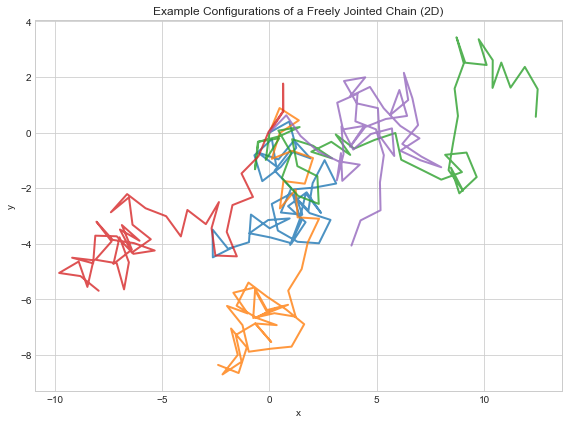

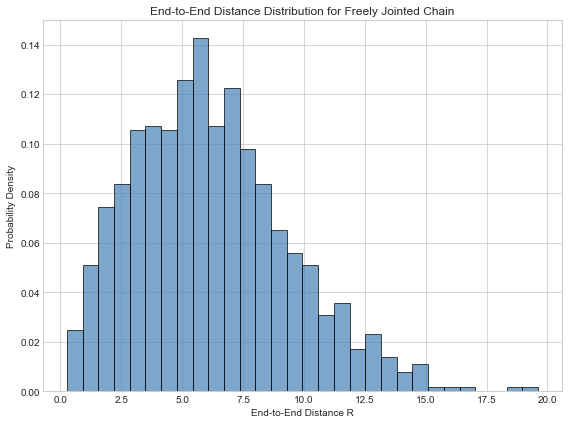

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

N = 50             # セグメント数
b = 1.0            # セグメント長
num_chains = 1000  # シミュレーション数

def simulate_chain(N, b):
    angles = np.random.uniform(0, 2*np.pi, N)
    # 各セグメントのベクトル
    segments = np.column_stack((b * np.cos(angles), b * np.sin(angles)))
    # 累積和で末端位置を計算
    positions = np.cumsum(segments, axis=0)
    positions = np.vstack(([0, 0], positions))
    return positions

# 数本の鎖の形状をプロット
plt.figure(figsize=(8,6))
for _ in range(5):
    pos = simulate_chain(N, b)
    plt.plot(pos[:,0], pos[:,1], lw=2, alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example Configurations of a Freely Jointed Chain (2D)")
plt.grid(True)
plt.tight_layout()
plt.savefig('FJC_ChainExamples.pdf', format='pdf')
plt.show()

# 末端間距離のヒストグラム
end_to_end = []
for _ in range(num_chains):
    pos = simulate_chain(N, b)
    R = np.linalg.norm(pos[-1])
    end_to_end.append(R)
    
plt.figure(figsize=(8,6))
plt.hist(end_to_end, bins=30, density=True, color='steelblue', edgecolor='k', alpha=0.7)
plt.xlabel("End-to-End Distance R")
plt.ylabel("Probability Density")
plt.title("End-to-End Distance Distribution for Freely Jointed Chain")
plt.tight_layout()
plt.savefig('FJC_EndToEndDistribution.pdf', format='pdf')
plt.show()

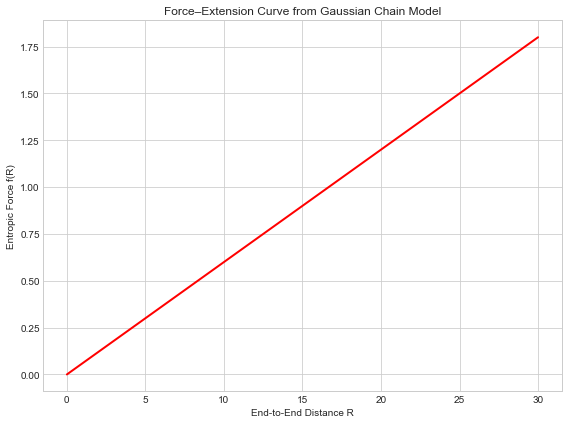

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

# パラメータ設定
N = 50         # セグメント数
b = 1.0        # セグメント長
kT = 1.0       # 温度定数 (k_B T)
R_max = N * b  # 最大延長（あくまで参考値）

# 伸びた距離 R を 0～ R_max の範囲で定義（小変形領域では線形応答）
R = np.linspace(0, 0.6*N*b, 300)  # 0～0.6 N*b の範囲
f = (3 * kT / (N * b**2)) * R

plt.figure(figsize=(8,6))
plt.plot(R, f, 'r-', lw=2)
plt.xlabel("End-to-End Distance R")
plt.ylabel("Entropic Force f(R)")
plt.title("Force–Extension Curve from Gaussian Chain Model")
plt.grid(True)
plt.tight_layout()
plt.savefig('GaussianChain_ForceExtension.pdf', format='pdf')
plt.show()

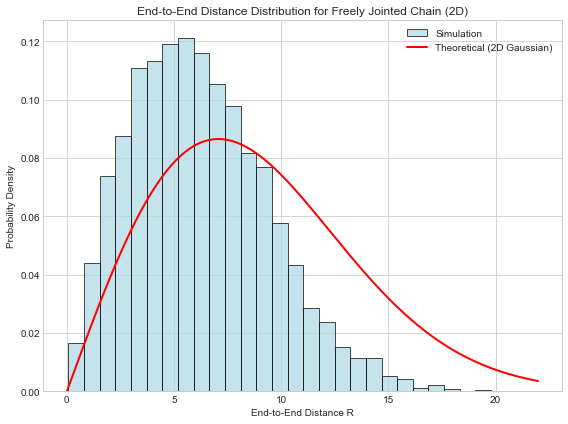

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

N = 50             # Number of segments
b = 1.0            # Segment length
num_chains = 5000  # シミュレーション数

def simulate_chain_2d(N, b):
    angles = np.random.uniform(0, 2*np.pi, N)
    segments = np.column_stack((b * np.cos(angles), b * np.sin(angles)))
    positions = np.cumsum(segments, axis=0)
    positions = np.vstack(([0, 0], positions))
    return positions

end_to_end = []
for _ in range(num_chains):
    pos = simulate_chain_2d(N, b)
    R_val = np.linalg.norm(pos[-1])
    end_to_end.append(R_val)
end_to_end = np.array(end_to_end)

# 理論分布（2次元の場合）
R = np.linspace(0, np.max(end_to_end), 200)
mean_R2 = N * b**2
P_R = (R / mean_R2) * np.exp(-R**2 / (2 * mean_R2))
# 正規化（面積を合わせる）
P_R = P_R / np.trapz(P_R, R)

plt.figure(figsize=(8,6))
plt.hist(end_to_end, bins=30, density=True, color='lightblue', edgecolor='k', alpha=0.7, label="Simulation")
plt.plot(R, P_R, 'r-', lw=2, label="Theoretical (2D Gaussian)")
plt.xlabel("End-to-End Distance R")
plt.ylabel("Probability Density")
plt.title("End-to-End Distance Distribution for Freely Jointed Chain (2D)")
plt.legend()
plt.tight_layout()
plt.savefig('FJC_EndToEndDistribution_2D.pdf', format='pdf')
plt.show()

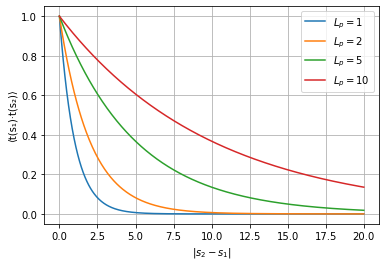

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lp_values = [1, 2, 5, 10]  # さまざまな持続長 Lp の例
s_diff = np.linspace(0, 20, 500)  # |s2 - s1| の範囲

# プロット
plt.figure()
for Lp in Lp_values:
    correlation = np.exp(-s_diff / Lp)
    plt.plot(s_diff, correlation, label=f"$L_p={Lp}$")

plt.xlabel("$|s_2 - s_1|$")
plt.ylabel("⟨t(s₁)·t(s₂)⟩")
plt.legend()
plt.grid(True)
plt.savefig('tension.pdf', format='pdf')
plt.show()